# Fig.3 Population frequency of cooperators

### 20211127_224624_μ1_n4.csv
```
trial_count = 100
agent_count = 10^3
generations = 10^3

network_type_list = [:scale_free_4]
hop_game_list = [1, 2, 3, 4, 5, 6, 7]
hop_learning_list = [1, 2, 3, 4, 5, 6, 7]
n_game_list = [4]
n_learning_list = [4]
b_list = [2.0, 3.0, 4.0, 5.0]
μ = 0.01
```

### 20211126_074228_μ0_n4.csv
```
μ = 0.00
```

In [1]:
import itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale = 1.4, style = 'darkgrid')

In [32]:
def load_df_all(csv_file_name: str) -> pd.DataFrame:
    return pd.read_csv(csv_file_name, header=None, names=[
        'network_type', 'hop_game', 'hop_learning', 'n_game', 'n_learning', 'b', 'trial', 'step', 'cooperator_rate'
    ])

def filter_by_network_hop_n_b(
    df: pd.DataFrame, network_type:str, hop_games:list, hop_learnings: list, n_game:int, n_learning:int, bs: list
) -> pd.DataFrame:
    return df[
        (df.network_type == network_type) &
        (df.hop_game.isin(hop_games)) &
        (df.hop_learning.isin(hop_learnings)) &
        (df.n_game == n_game) &
        (df.n_learning == n_learning) &
        (df.b.isin(bs))
    ][[
        'hop_game', 'hop_learning', 'b', 'trial', 'step', 'cooperator_rate'
    ]].reset_index(drop=True)

def filter_by_step(df: pd.DataFrame, step:int) -> pd.DataFrame:
    return df[df.step >= step].reset_index(drop=True)

def mean_by_hop_b(df: pd.DataFrame) -> pd.DataFrame:
    return df.groupby([
        'hop_game', 'hop_learning', 'b'
    ]).agg({
        'cooperator_rate': np.mean
    }).reset_index()

def transform_for_heatmaps(df: pd.DataFrame, network_type: str) -> pd.DataFrame:
    _df = filter_by_network_hop_n_b(df, network_type, [1, 2, 3, 4, 5], [1, 2, 3, 4, 5], 4, 4, [2, 3])
    _df = filter_by_step(_df, 800)
    _df = mean_by_hop_b(_df)
    _df['cooperator_rate'] = _df['cooperator_rate'] * 100
    return _df

def pibot_by_hop(df: pd.DataFrame) -> pd.DataFrame:
    return pd.pivot_table(
        data=df,
        values='cooperator_rate',
        columns='hop_learning',
        index='hop_game',
        aggfunc=np.mean
    ).sort_index(level=0, ascending=False, inplace=False)

def draw_heatmaps(df: pd.DataFrame):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    for x, b in enumerate(set(df.b)):
        _df = pibot_by_hop(df[df.b == b])
        sns.heatmap(_df, annot=True, fmt='.1f', cmap='Blues', vmin=0, vmax=100, cbar=False, ax=axes[x])
        axes[x].set_xlabel('hopL')
        axes[x].set_ylabel('hopG')
        # plt.savefig('img/draw_heatmaps_b{}.png'.format(b), dpi = 300)

def draw_lines(df: pd.DataFrame):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    fig.suptitle('Transition of population frequency', fontsize=15)

    for x, b in enumerate(set(df.b)):
        _df = df[df.b == b]
        axes[x].set_title('b = {}'.format(b))
        axes[x].set_xlim(0, 1000)
        axes[x].set_ylim(0, 1)
        axes[x].set_ylabel('Population frequency of cooperators')
        palette = sns.color_palette('hls', len(set(df.hop_learning)))
        sns.lineplot(data=_df, x='step', y='cooperator_rate', hue='hop_learning', palette=palette, ax=axes[x])
        # plt.savefig('img/draw_lines_b{}.png'.format(b), dpi = 300)
        
def show(csv_file_name: str):
    df = load_df_all(csv_file_name)
    df_last200 = transform_for_heatmaps(df, 'scale_free_4')
    df_learning = filter_by_network_hop_n_b(df, 'scale_free_4', [1], [1, 2, 3, 4, 5], 4, 4, [2, 3])
    draw_heatmaps(df_last200)
    draw_lines(df_learning)

## Result

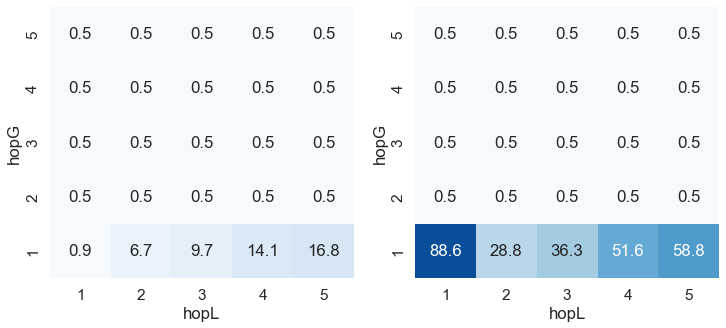

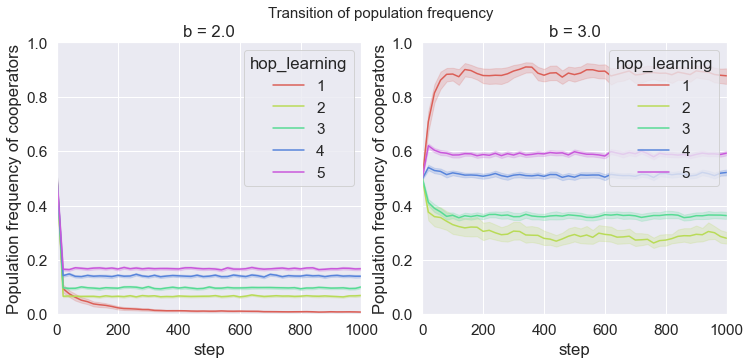

In [33]:
show("data/20211127_224624_μ1_n4.csv")

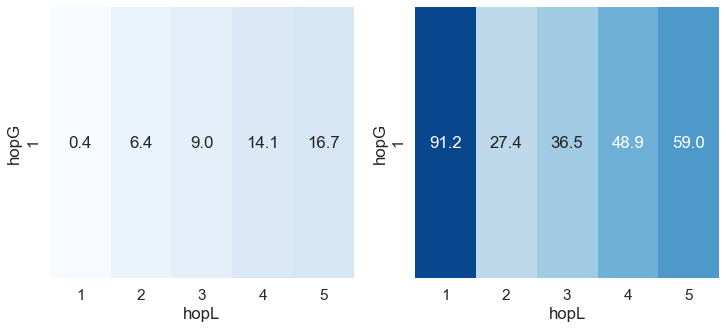

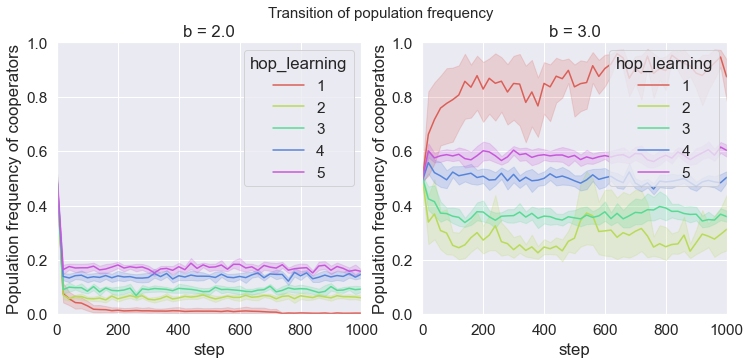

In [30]:
# best select
show("data/20220426_162529.csv")

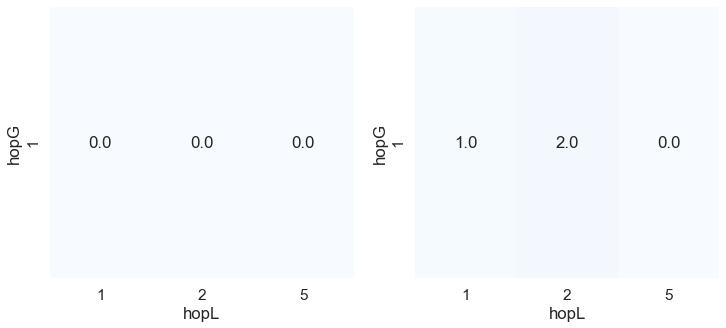

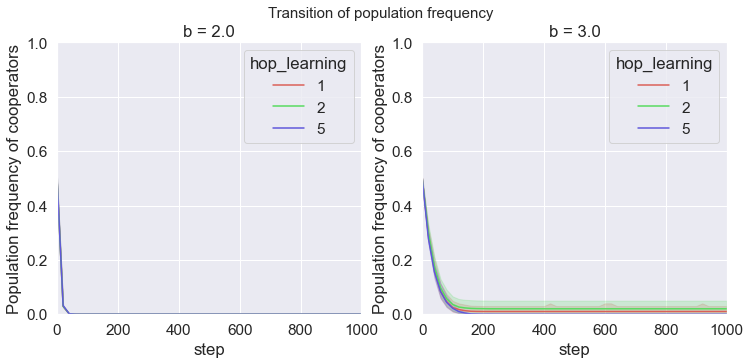

In [27]:
# 弱い選択
show("data/20220426_160120.csv")

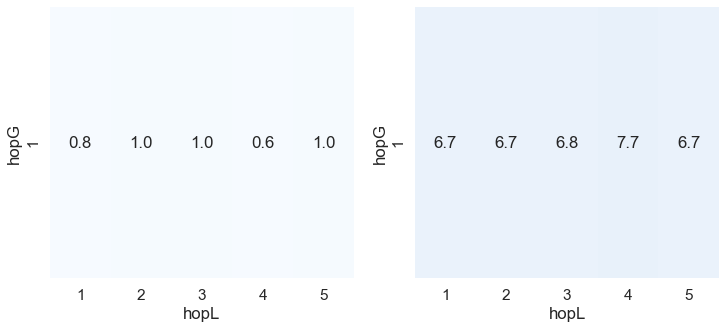

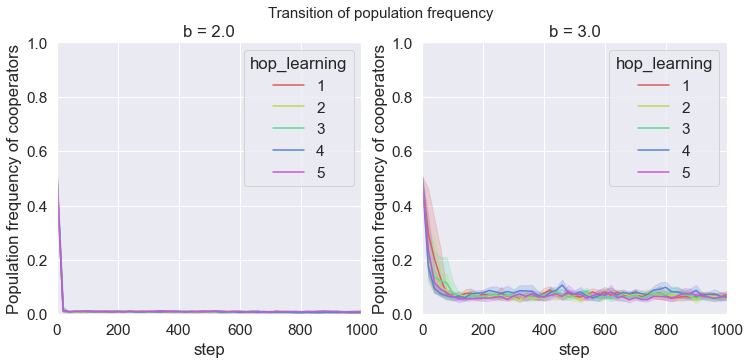

In [29]:
# 強い選択
show("data/20220426_162118.csv")